In [2]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

In [5]:
df = pd.read_csv('customer_segmentation_data.csv')

print(df.shape)
print(df.columns)
print(df.head())
print(df.info())
print(df.isnull().sum())

(1000, 9)
Index(['id', 'age', 'gender', 'income', 'spending_score', 'membership_years',
       'purchase_frequency', 'preferred_category', 'last_purchase_amount'],
      dtype='object')
   id  age  gender  income  spending_score  membership_years  \
0   1   38  Female   99342              90                 3   
1   2   21  Female   78852              60                 2   
2   3   60  Female  126573              30                 2   
3   4   40   Other   47099              74                 9   
4   5   65  Female  140621              21                 3   

   purchase_frequency preferred_category  last_purchase_amount  
0                  24          Groceries                113.53  
1                  42             Sports                 41.93  
2                  28           Clothing                424.36  
3                   5      Home & Garden                991.93  
4                  25        Electronics                347.08  
<class 'pandas.core.frame.DataFrame'>
R

In [6]:
df.head()


,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [7]:
df["gender"] = df["gender"].map({"Male":1,"Female":0})

df.dropna(inplace=True)

In [8]:
print(df.describe())

                id         age      gender         income  spending_score  \
count   673.000000  673.000000  673.000000     673.000000      673.000000   
mean    503.742942   43.111441    0.530461   88490.157504       50.148588   
std     287.035029   14.859994    0.499442   34731.715973       29.153564   
min       1.000000   18.000000    0.000000   30004.000000        1.000000   
25%     249.000000   30.000000    0.000000   57615.000000       25.000000   
50%     512.000000   43.000000    1.000000   88312.000000       50.000000   
75%     747.000000   56.000000    1.000000  117704.000000       76.000000   
max    1000.000000   69.000000    1.000000  149973.000000      100.000000   

       membership_years  purchase_frequency  last_purchase_amount  
count        673.000000          673.000000            673.000000  
mean           5.448737           26.950966            478.214175  
std            2.838008           14.047929            299.300087  
min            1.000000           

In [9]:
from sklearn.preprocessing import StandardScaler

features = ["age", "gender", "income", "spending_score", 
            "membership_years", "purchase_frequency", "last_purchase_amount"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])


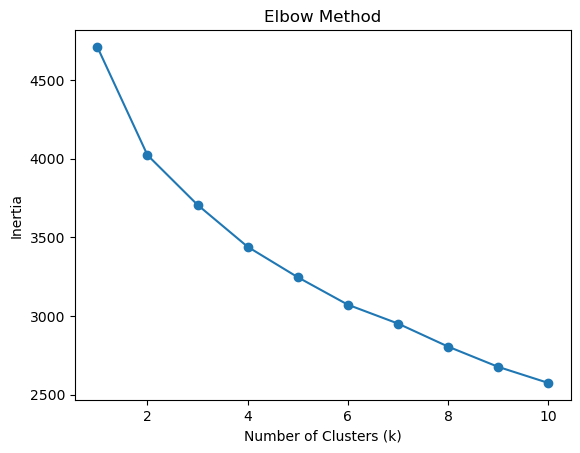

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [11]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df["Cluster"] = clusters


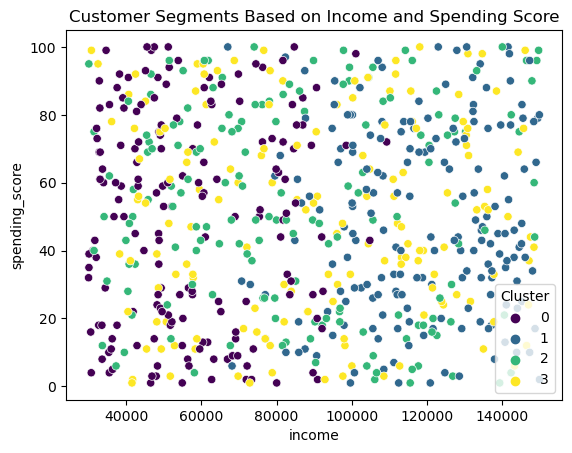

In [12]:
import seaborn as sns

sns.scatterplot(
    x=df["income"],
    y=df["spending_score"],
    hue=df["Cluster"],
    palette="viridis"
)
plt.title("Customer Segments Based on Income and Spending Score")
plt.show()


In [13]:
cluster_profile = df.groupby("Cluster")[features].mean()
print(cluster_profile)


               age    gender         income  spending_score  membership_years  \
Cluster                                                                         
0        43.664706  1.000000   57130.658824       49.041176          6.523529   
1        41.274194  1.000000  118020.112903       48.354839          4.704301   
2        45.037037  0.006173   85393.240741       53.135802          3.981481   
3        42.696774  0.000000   90685.277419       50.393548          6.696774   

         purchase_frequency  last_purchase_amount  
Cluster                                            
0                 28.523529            532.395824  
1                 28.220430            464.452097  
2                 14.783951            426.592778  
3                 36.419355            489.256323  


In [14]:
category_distribution = df.groupby("Cluster")["preferred_category"].value_counts(normalize=True)
print(category_distribution)


Cluster  preferred_category
0        Electronics           0.247059
         Sports                0.211765
         Groceries             0.200000
         Home & Garden         0.176471
         Clothing              0.164706
1        Home & Garden         0.252688
         Sports                0.220430
         Groceries             0.193548
         Electronics           0.182796
         Clothing              0.150538
2        Groceries             0.234568
         Clothing              0.209877
         Electronics           0.191358
         Home & Garden         0.191358
         Sports                0.172840
3        Home & Garden         0.238710
         Electronics           0.219355
         Sports                0.212903
         Groceries             0.187097
         Clothing              0.141935
Name: proportion, dtype: float64
